# Time Series Data Analysis

Importing Libraries

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Reading data with Pandas library

In [47]:
df = pd.read_csv("./doas-23-24.csv", index_col=False)
print(df.head(5))
df["Date"] = pd.to_datetime(df["Date"])

                Date   Open   High    Low  Close   Volume
0  1/2/2023 18:10:00  196.0  197.7  191.6  192.5  1868777
1  1/3/2023 18:10:00  193.5  194.5  185.1  185.9  1795253
2  1/4/2023 18:10:00  185.9  189.2  182.1  184.6  1531087
3  1/5/2023 18:10:00  185.0  187.0  170.8  181.0  1316451
4  1/6/2023 18:10:00  174.5  178.0  166.9  174.6  2975424


Converting column names to lower case

In [48]:
df.columns = [column.lower() for column in df.columns]
print(df.columns)
print(df.info())

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    248 non-null    datetime64[ns]
 1   open    248 non-null    float64       
 2   high    248 non-null    float64       
 3   low     248 non-null    float64       
 4   close   248 non-null    float64       
 5   volume  248 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB
None


Setting index as "date" column

In [49]:

df.set_index("date", inplace=True)
print(df.head(5))

                      open   high    low  close   volume
date                                                    
2023-01-02 18:10:00  196.0  197.7  191.6  192.5  1868777
2023-01-03 18:10:00  193.5  194.5  185.1  185.9  1795253
2023-01-04 18:10:00  185.9  189.2  182.1  184.6  1531087
2023-01-05 18:10:00  185.0  187.0  170.8  181.0  1316451
2023-01-06 18:10:00  174.5  178.0  166.9  174.6  2975424


Finding mean value for specific month and specific time interval

In [76]:
df.loc["2023-08", "close"].mean()

274.8181818181818

In [79]:
df.loc["2023-08-01": "2023-09-01", "close"].mean()

275.17826086956524

Getting close price with resample method.

Resample method is commonly used for time series data. The index must be date-time-like. *ME* stands for month end. MS is for month start.

In [84]:
df["close"].resample("ME").mean()

date
2023-01-31    165.004545
2023-02-28    160.920000
2023-03-31    135.008696
2023-04-30    126.300000
2023-05-31    125.804762
2023-06-30    150.168421
2023-07-31    215.285714
2023-08-31    274.818182
2023-09-30    270.228571
2023-10-31    264.495455
2023-11-30    265.031818
2023-12-31    236.257143
Freq: ME, Name: close, dtype: float64

Plotting the graph for the resampled data. For the proper documentation of time series for pandas, follow the link: https://pandas.pydata.org/docs/user_guide/timeseries.html

<Axes: xlabel='date'>

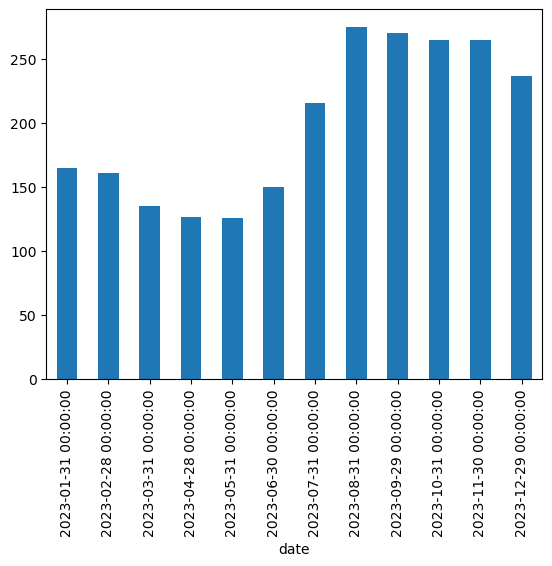

In [92]:
df["close"].resample("BME").mean().plot(kind="bar")

## Creating Dates from scratch
Pandas has a method named **date_range()**. Its arguments are just as followings:
    "start" -> start date
    "end" -> end date
    "freq" -> argument to avoid holidays or weekends. (B is stands for business).


After creating the dates and assigning it to a variable, you will be able to set this variable as index with inplace argument of *set_index* method.

### Filling Holidays
In finance, the data of working days are collected. However, you may include holidays in your problem if it is necesarry. In order to fill the gaps of the data, **asfreq** method is used. 
Method argument may be used as "pad", and freq value can be passed as "D" for days.